# Proyek Analisis Data: Bike-Sharing Dataset
- Nama:Indra Juliansyah Putra
- Email: mrindrajuliansyahputra10@gmail.com
- Id Dicoding:abdi_ijul28

## Menentukan Pertanyaan Bisnis

##### Tren Peminjaman Sepeda:
- Bagaimana tren peminjaman sepeda berubah seiring waktu?
- Apakah ada pola musiman atau peningkatan/penurunan tertentu pada jam, hari, atau bulan tertentu?

##### Pengaruh Cuaca Terhadap Peminjaman:
- Bagaimana cuaca (weathersit) mempengaruhi jumlah peminjaman sepeda?
- Apakah terdapat perbedaan signifikan dalam peminjaman sepeda pada kondisi cuaca tertentu?

##### Pengaruh Hari Libur dan Hari Kerja:
- Bagaimana perbedaan peminjaman sepeda antara hari libur dan hari kerja?
- Apakah pola peminjaman sepeda berubah pada akhir pekan atau hari libur?

##### Pengaruh Temperatur dan Kelembapan:
- Bagaimana suhu dan kelembapan mempengaruhi jumlah peminjaman sepeda?
- Apakah ada korelasi antara kondisi suhu dan kelembapan dengan jumlah peminjaman sepeda?

##### Kontribusi Pengguna Casual dan Terdaftar:
- Bagaimana kontribusi pengguna casual dan terdaftar terhadap total peminjaman sepeda?
- Apakah ada perbedaan perilaku peminjaman antara pengguna casual dan terdaftar?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Wrangling

### 1.1 Gathering Data

In [2]:
bike_data = pd.read_csv('data\hour.csv')

### 1.2 Assessing Data

#### 1.2.1 Mengetahui Dimensi data

In [3]:
bike_data.shape

(17379, 17)

#### 1.2.2 Menampilkan 5 baris pertama

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 1.2.3 Mengetahui tipe data setiap kolom

In [5]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### 1.2.4 Menampilkan jumlah nilai yang tidak null dalam setiap kolom

In [6]:
bike_data.notnull().sum()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

#### 1.2.5 Memeriksa nilai yang hilang (null) dalam setiap kolom

In [7]:

bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang null atau kosong

#### 1.2.6 Menampilkan baris duplikat dalam dataset

In [8]:
bike_data[bike_data.duplicated()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### 1.2.7 Menampilkan informasi dataset

In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### 1.2.8 Mengubah Nama Kolom agar lebih sesuai

In [10]:
bike_data = bike_data.rename(columns= {'dteday':'date', 'yr':'year', 'mnth':'month', 'hr': 'hour', 'weathersit': 'weather', 'hum':'humidity', 'casual': 'casual_user', 'registered': 'registered_user', 'cnt':'count'})

### 1.3 Cleaning Data

#### 1.3.1 Mengubah tipe data beberapa kolom menjadi category

In [11]:
categorical_columns = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
bike_data[categorical_columns] = bike_data[categorical_columns].astype('category')

#### 1.3.2 Mengubah tipe data kolom tanggal menjadi datetime

In [12]:
bike_data['date'] = pd.to_datetime(bike_data['date'])

#### 1.3.3 Menghapus kolom instant karena tidak berkaitan dan tidak memberikan informasi

In [13]:
del bike_data['instant']

## 2. Exploratory Data Analysis (EDA)

### 2.1 Explore detail setiap kolom

##### 2.1.2 Kolom Date

In [14]:
bike_data['date'].value_counts()

date
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64

In [15]:
bike_data['date'].min(), bike_data['date'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-31 00:00:00'))

##### 2.1.3 Kolom Season

In [16]:
bike_data['season'].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

##### 2.1.4 Kolom Year (Tahun)

In [17]:
bike_data['year'].value_counts()

year
1    8734
0    8645
Name: count, dtype: int64

##### 2.1.5 Kolom Month (Bulan)

In [18]:
bike_data['month'].value_counts()

month
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

##### 2.1.6 Kolom Hour (Jam)

In [19]:
bike_data['hour'].value_counts()

hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

##### 2.1.7 Kolom Holiday

In [20]:
bike_data['holiday'].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

##### 2.1.8 Kolom Hari

In [21]:
bike_data['weekday'].value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

##### 2.1.9 Kolom Workingday

In [22]:
bike_data['workingday'].value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

##### 2.1.10 Kolom Weather

In [23]:
bike_data['weather'].value_counts()

weather
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

##### 2.1.11 Kolom temp

In [24]:
bike_data['temp'].min(), bike_data['temp'].max()

(0.02, 1.0)

##### 2.1.12 Kolom atemp

In [25]:
bike_data['atemp'].min(), bike_data['atemp'].max()

(0.0, 1.0)

##### 2.1.13 Kolom Humidity

In [26]:
bike_data['humidity'].min(), bike_data['humidity'].max()

(0.0, 1.0)

##### 2.1.14 Kolom windspeed

In [27]:
bike_data['windspeed'].min(), bike_data['windspeed'].max()

(0.0, 0.8507)

##### 2.1.15 Kolom casual user

In [28]:
bike_data['casual_user'].min(), bike_data['casual_user'].max()

(0, 367)

##### 2.1.16 Kolom registered user

In [29]:
bike_data['registered_user'].min(), bike_data['registered_user'].max()

(0, 886)

##### 2.1.17 Kolom count (Jumlah pengguna)

In [30]:
bike_data['count'].min(), bike_data['count'].max()

(1, 977)

#### 2.2 Menyimpan hasil cleaning ke fil baru

In [31]:
bike_data.to_csv('hour_clean.csv', index=False)

## 3. Visualization & Explanatory Analysis

<Axes: >

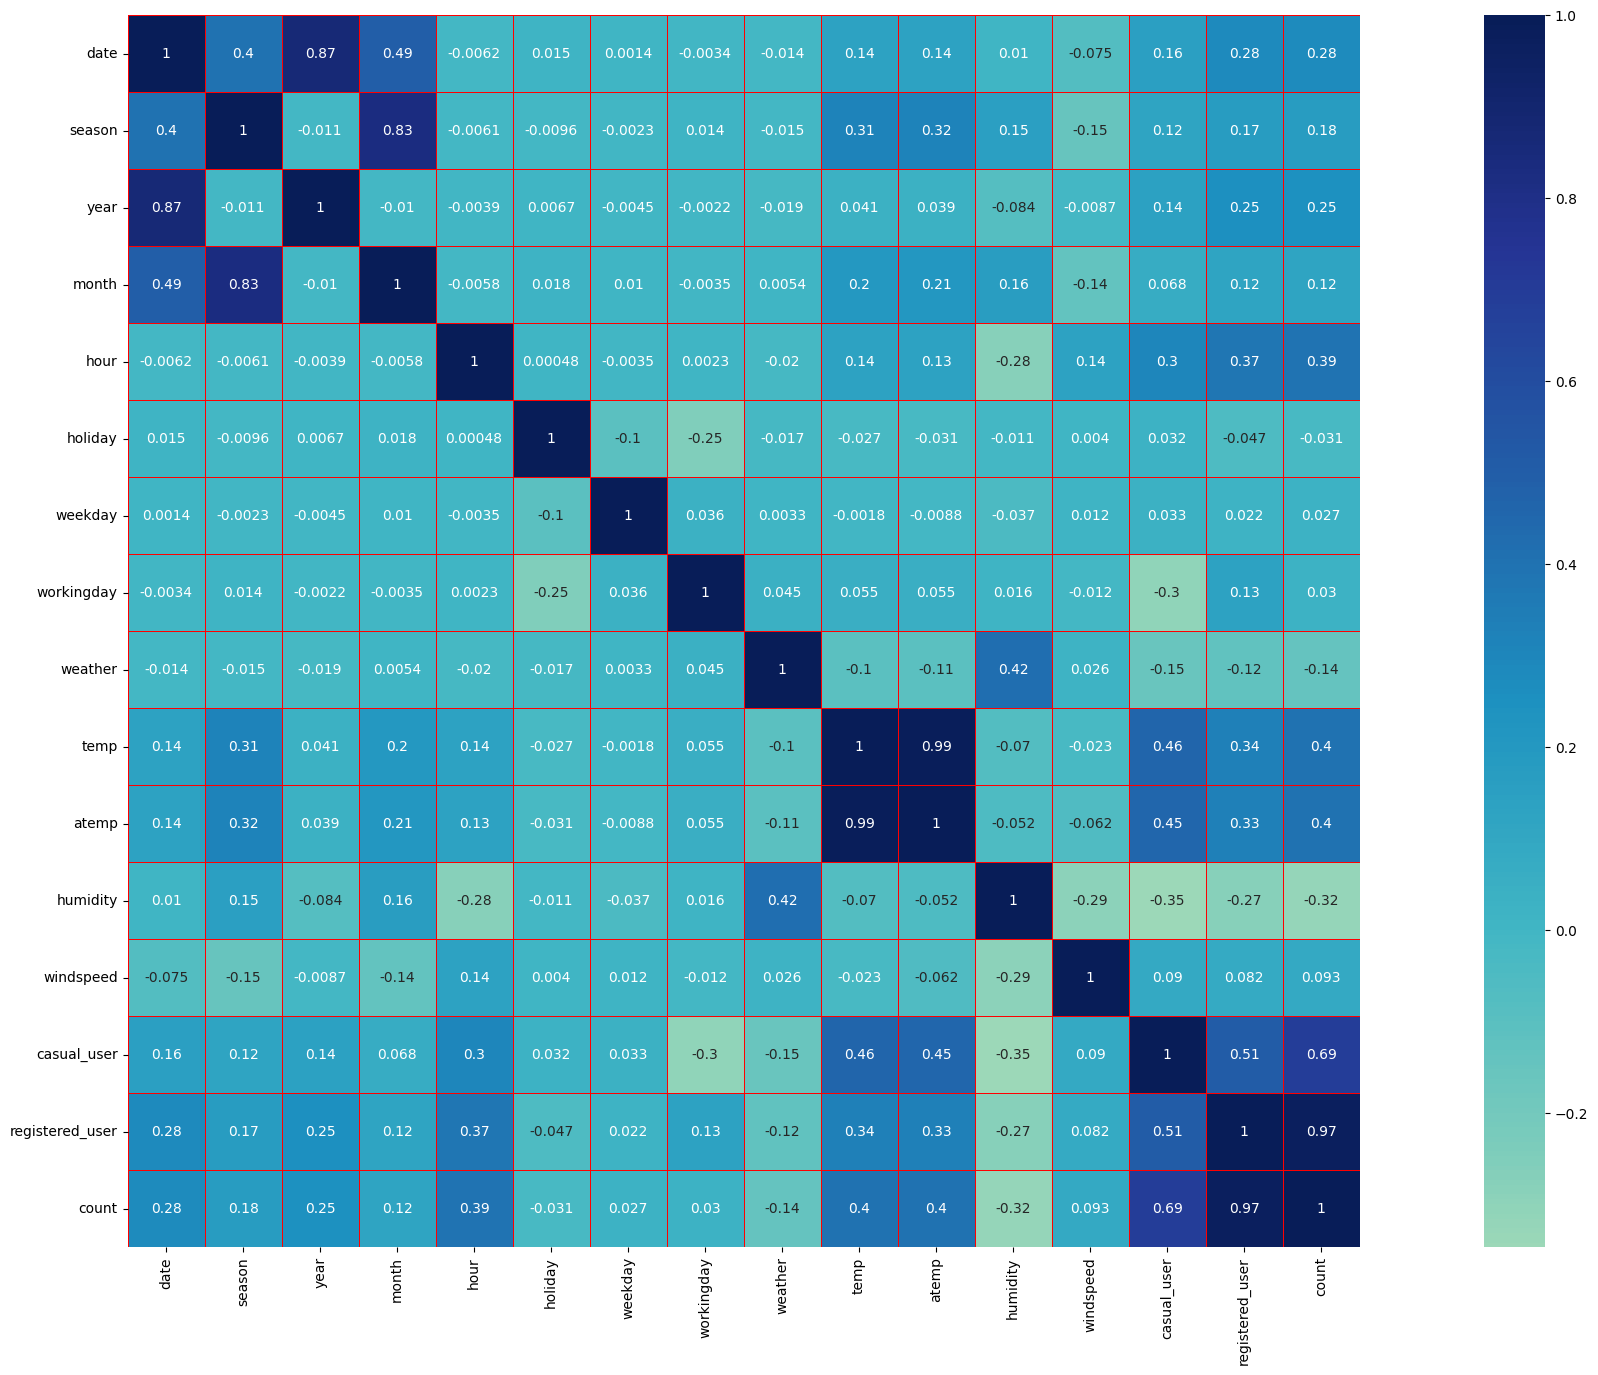

In [32]:
plt.figure(figsize=(32,16))
sns.heatmap(bike_data.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0,linecolor="red", annot=True)

### Pertanyaan 1: Jumlah peminjaman sepeda per hari

In [33]:
import plotly.express as px

# Resample the `count` column by month
df_by_month = bike_data.set_index("date").resample("M")["count"].sum()

# Create a Plotly figure
fig = px.line(df_by_month, x=df_by_month.index, y=df_by_month, title="Jumlah Pengguna Rental Sepeda per Bulan")

# Add a hover text that shows the value for each point
fig.update_traces(hovertemplate="Jumlah pengguna: %{y}")

# Plot the figure
fig.show()

Grafik di atas menunjukkan tren jumlah peminjaman sepeda per bulan dari tahun 2011 hingga 2012. Grafik ini menunjukkan bahwa jumlah peminjaman sepeda secara umum mengalami fluktuasi, tetapi secara keseluruhan cenderung meningkat.

In [34]:
bike_data = bike_data.set_index('date')

In [35]:
bike_data["day_of_month"] = bike_data.index.day
bike_data["day_of_week"]  = bike_data.index.dayofweek
bike_data["month"] = bike_data.index.month

In [36]:
bike_data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_user,registered_user,count,day_of_month,day_of_week
date,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,5
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,5
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,5
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,5
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,5


In [37]:
day_of_week_counts = bike_data.groupby("day_of_week")["count"].mean()

day_of_week_labels = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Ganti label sumbu x
fig = px.bar(day_of_week_counts, x=day_of_week_counts.index, y="count", title="Rata-rata Pengguna Rental Sepeda per Hari dalam Seminggu")
fig.update_xaxes(tickvals=day_of_week_counts.index, ticktext=day_of_week_labels)

# Tampilkan grafik
fig.show()

Rata-rata pengguna sepeda per hari dalam seminggu cenderung sama, yaitu sekitar 185.000-an pengguna. Namun, Rata-rata pengguna sepeda meningkat dari Senin hingga Kamis, dan menurun dari Jumat hingga Minggu. Peningkatan Rata-rata pengguna dari Senin hingga Kamis kemungkinan disebabkan oleh aktivitas masyarakat sehari-hari, sedangkan penurunan Rata-rata pengguna dari Jumat hingga Minggu kemungkinan disebabkan oleh aktivitas masyarakat pada akhir pekan.

In [38]:
day_of_month_counts = bike_data.groupby("day_of_month")["count"].mean()

# Buat grafik batang
fig = px.bar(day_of_month_counts, x=day_of_month_counts.index, y="count", title="Jumlah Pengguna Rental Sepeda per Hari dalam Sebulan")

fig.update_traces(hovertemplate="Jumlah pengguna: %{y}")

# Atur label sumbu x
fig.update_xaxes(tickvals=np.arange(0, 32), ticktext=[str(i) for i in range(0, 25)])

# Tampilkan grafik
fig.show()

In [39]:
day_of_hour_counts = bike_data.groupby("hour")["count"].mean()

fig = px.line(day_of_hour_counts, x=day_of_hour_counts.index, y="count", title="Rata-rata Pengguna Rental Sepeda per jam dalam Sehari")

# Tambahkan hover text dengan jumlah pengguna
fig.update_traces(hovertemplate="Jumlah pengguna: %{y}")

# Atur label sumbu x
fig.update_xaxes(tickvals=np.arange(0, 25), ticktext=[str(i) for i in range(0, 25)])

# Tampilkan grafik
fig.show()

In [40]:
grouped_hour = bike_data.groupby(['workingday', 'hour'])['count'].mean().reset_index(name= 'counts')

fig = px.line(grouped_hour, x = 'hour', y = 'counts', color = 'workingday', labels = {'counts': 'Jumlah Pengguna'}, title= 'Jumlah Pengguna Rental Sepeda per Jam')
fig.update_xaxes(tickvals=np.arange(0, 25), ticktext=[str(i) for i in range(0, 25)])
fig.show()

In [41]:
grouped_month_count = bike_data.groupby(['month', 'workingday'])['count'].sum().reset_index(name= 'counts')

fig = px.bar(
    grouped_month_count,
    x="month",
    y="counts",
    color="workingday",
    barmode="group",
    labels={
        "x": "Bulan",
        "y": "Jumlah Peminjaman",
        "color": "Hari Kerja",
    },
    title="Tren Peminjaman Sepeda berdasarkan Bulan dan Hari Kerja",
)

# Customize plot
fig.update_layout(width=1600, height=1000)

# Display plot
fig.show()

In [42]:
fig = px.box(bike_data, x='season', y='count', color = "season", title="Persebaran Jumlah Peminjam di setiap musimnya")

fig.show()

In [43]:
print(bike_data["workingday"].unique())

[0, 1]
Categories (2, int64): [0, 1]


### Pertanyaan 2: 

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2